In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sympy.functions.special.delta_functions import Heaviside

In [2]:
# defining psychometric curve function
def psycurves(x, u, l, b, s):
  """ 4-parameters psychometric function

  Args:
    x (ndarray): data to fit
    u (float): upper assymptote (lim psycurve when (stim -> +inf))
    l (float): lower assymptote (lim psycurve when (stim -> -inf))
    b (float): bias (stim value where psycurve crosses chance level)
    s (float): slope  

  Returns:
    ndarray: estimated parameter values of shape (n_regressors)
  """
    
  return (u-l)*((np.exp((x-b)/s))/(1 + np.exp((x-b)/s))) + l

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[9.65418097e-01 3.45823010e-02 5.37411635e-07 1.31265667e-01]


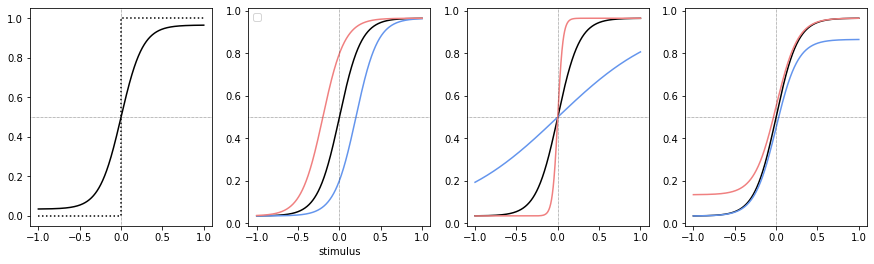

In [108]:
xx = np.linspace(-1, 1, 1000)
yy = [0.03, .05, .2, .8, .95, .97]
xxstim = np.linspace(-1, 1, len(yy))

popt, _ = curve_fit(psycurves, xxstim, yy)

fig, ax = plt.subplots(1,4, figsize=(15, 4))
plt.subplot(1, 4, 1)
plt.step([-1, -.5, 0, .5, 1], [0, 0, 0, 1, 1], 'k', linestyle = ':')
plt.plot(xx, psycurves(xx, *popt), c = 'k') 
plt.axvline(0, linestyle = ':', c = 'k',  lw = .5)
plt.axhline(.5, linestyle = ':', c = 'k', lw = .5)


plt.subplot(1, 4, 2)
pbias = (popt + [0, 0, 0.2, 0])
nbias = (popt + [0, 0, -0.2, 0])

plt.plot(xx, psycurves(xx, *popt), c = 'k') 
plt.plot(xx, psycurves(xx, *pbias), c = 'cornflowerblue')
plt.plot(xx, psycurves(xx, *nbias), c = 'lightcoral')
plt.axvline(0, linestyle = ':', c = 'k',  lw = .5)
plt.axhline(.5, linestyle = ':', c = 'k', lw = .5)
plt.xlabel('stimulus')
plt.legend()


plt.subplot(1, 4, 3)
lslope = (popt + [0, 0, 0, 0.5])
mslope = (popt + [0, 0, 0, -0.1])

plt.plot(xx, psycurves(xx, *popt), c = 'k') 
plt.plot(xx, psycurves(xx, *lslope), c = 'cornflowerblue')
plt.plot(xx, psycurves(xx, *mslope), c = 'lightcoral')
plt.axvline(0, linestyle = ':', c = 'k',  lw = .5)
plt.axhline(.5, linestyle = ':', c = 'k', lw = .5)

print(popt)

plt.subplot(1, 4, 4)
ulapse = (popt + [-.1, 0, 0, 0])
llapse = (popt + [0, .1, 0, 0])

plt.plot(xx, psycurves(xx, *popt), c = 'k') 
plt.plot(xx, psycurves(xx, *ulapse), c = 'cornflowerblue')
plt.plot(xx, psycurves(xx, *llapse), c = 'lightcoral')
plt.axvline(0, linestyle = ':', c = 'k',  lw = .5)
plt.axhline(.5, linestyle = ':', c = 'k', lw = .5)

plt.savefig("figure.eps") 